In [27]:
%matplotlib inline 

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import math

In [28]:
def GCM(a, c, m, n):
    x = 123456789
    U = [1.0]*(n+1)
    for i in range(n+1):
        x = (a*x+c)%m
        U[i] = x/m
    return U[1:(n+1)]

RANDU = GCM(65539, 0, 2**31, 10000)
Sinclair = GCM(75, 0, 2**16+1, 10000)
NumRec = GCM(1664525, 1013904223, 2**32, 10000)
Borland = GCM(22695477, 0, 2**32, 10000)

In [29]:
def KS(generador):
    N = len(generador)
    u = [1.0] * N
    x = generador

    count, bins, ignored = plt.hist(x, 25, normed=True)
    plt.plot(bins, np.ones_like(bins), linewidth=2, color='r')
    plt.show()

    x1 = np.arange(1/N,1+1/N,1/N)
    y1 = np.cumsum(np.sort(u)/np.max(np.cumsum(u)))

    x2 = np.sort(x)
    y2 = np.cumsum(np.sort(x)/np.max(np.cumsum(x)))

    De=np.absolute(y2-y1)
    print("De = ",np.max(De))

    # Plotting
    plt.plot(x1,y1,label='Uniform')
    plt.step(x2,y2,label='Random')
    x3 = [x1[De.argmax()],x1[De.argmax()]]
    y3 = [np.min([y1[De.argmax()],y2[De.argmax()]]),np.max([y1[De.argmax()],y2[De.argmax()]])]
    plt.step(x3,y3,label='D')

    plt.legend()
    plt.xlabel('X')
    plt.ylabel('Cumulative Probability P(X)')

    plt.ylim(0, 1.05)

    plt.show()
    
    # scipy function for K-S test
    from scipy import stats
    D,pvalue = stats.kstest(y2, 'uniform')
    print("D = ", D)
    print("p-value = ", pvalue)
    Da = 1.29/(math.sqrt(25)+0.12+0.11/math.sqrt(25))
    #Da = 1.628/math.sqrt(N)
    if (D<=(Da)):
        print ("Es un buen generador uniforme")
        print (Da)
    else:
        print ("No es un buen generador uniforme")
        print (Da)
    

# Kosmogorov-Smirnov (KS)

   # RANDU

C:\Users\Camilo\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


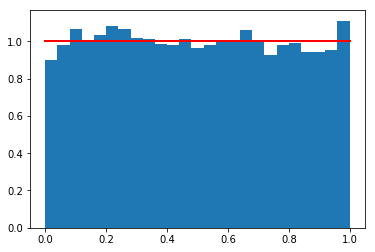

De =  0.2505264997206956


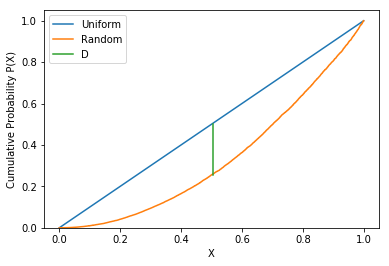

D =  0.25052649972073476
p-value =  0.0
Es un buen generador uniforme
0.2508751458576429


In [30]:
KS(RANDU)

# Sinclair

C:\Users\Camilo\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


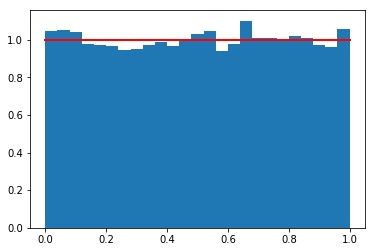

De =  0.25064697857842766


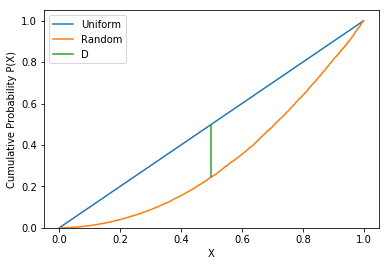

D =  0.2506469785784661
p-value =  0.0
Es un buen generador uniforme
0.2508751458576429


In [31]:
KS(Sinclair)

# Numerical Receipes

C:\Users\Camilo\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


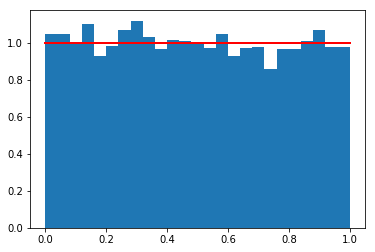

De =  0.2539372680927675


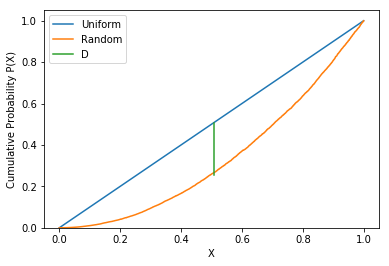

D =  0.25393726809280703
p-value =  0.0
No es un buen generador uniforme
0.2508751458576429


In [32]:
KS(NumRec)

# Borland C/C++

C:\Users\Camilo\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


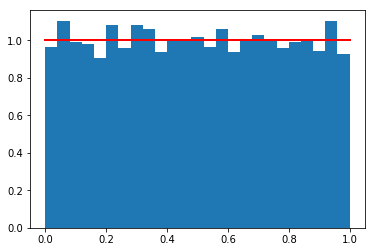

De =  0.2504821785894745


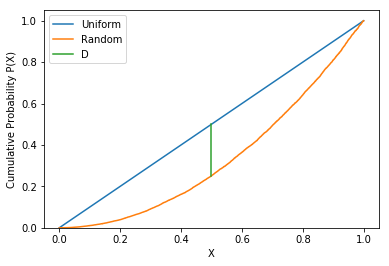

D =  0.25048217858951327
p-value =  0.0
Es un buen generador uniforme
0.2508751458576429


In [33]:
KS(Borland)

C:\Users\Camilo\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


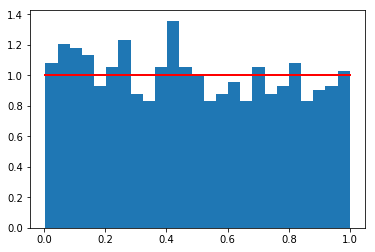

De =  0.2587740070727683


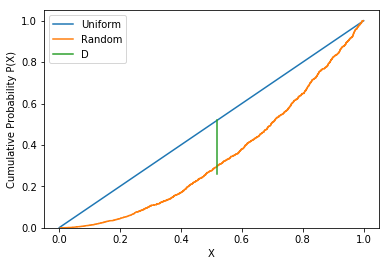

D =  0.258774007072768
p-value =  0.0
No es un buen generador uniforme
0.2508751458576429


In [34]:
KS(GCM(5, 1, 2**12, 1000))

# Chi cuadrada ( $\chi^{2}$)

In [35]:
#import matplotlib.pyplot as plt
#%matplotlib inline


def chiCuadrado(generador):
    k = 10
    N = 1000

    ei = N/k
    grados = k-1
    tabla = 16.919
    frecuencias, separa, aux = plt.hist(generador, k, normed=False)
    plt.clf()
    suma = 0
    for s in range(1,k+1):
        suma+=(frecuencias[s-1]-ei)**2/ei
    print ("X^2 =",suma)
    
    if suma<tabla:
        return "Es uniforme"
    else:
        return "No es suficientemente uniforme"

# RANDU

In [36]:
chiCuadrado(RANDU)

X^2 = 81124.14


C:\Users\Camilo\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


'No es suficientemente uniforme'

<Figure size 432x288 with 0 Axes>

# Sinclair

In [37]:
chiCuadrado(Sinclair)

X^2 = 81070.32


C:\Users\Camilo\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


'No es suficientemente uniforme'

<Figure size 432x288 with 0 Axes>

# Numerical Receipes

In [38]:
chiCuadrado(NumRec)

C:\Users\Camilo\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


X^2 = 81127.18


'No es suficientemente uniforme'

<Figure size 432x288 with 0 Axes>

# Borland C/C++

In [39]:
chiCuadrado(Borland)

X^2 = 81086.51999999999


C:\Users\Camilo\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


'No es suficientemente uniforme'

<Figure size 432x288 with 0 Axes>

# Test de Rachas

In [67]:
evaluador = 1.960
def testRachas(generador):
    N = 1000
    Sucesion = ""    
    for i in range(N-1):
        if generador[i]<generador[i+1]:
            Sucesion+="1"
        else:
            Sucesion+="0"
    #print (Sucesion)
    contarRachas(Sucesion)
    
def contarRachas(s):
    rachas = 0
    flag_unos = False
    flag_ceros = False
    uno = 0
    cero = 0 
    for j in range(len(s)):
        if s[j]=="1":
            uno+=1            
            if flag_unos==False:
                rachas+=1
                flag_unos = True
                flag_ceros = False            
        else:
            cero+=1            
            if flag_ceros==False:
                rachas+=1
                flag_ceros = True
                flag_unos = False
    print ("Unos:",uno)
    print ("Ceros:",cero)
    print ("Rachas:",rachas)
    Evaluar(uno,cero,rachas)

def Evaluar(Uno, Cero, Rachas):
    global evaluador
    totales = Uno+Cero
    Z = ((Rachas-((2*totales)-1))/3)/(math.sqrt((16*totales-29)/90))
    print(abs(Z),evaluador)
    if abs(Z)>evaluador: 
        print("No cumple con el criterio")
    else: 
        print("Cumple con el criterio")

# RANDU

In [68]:
testRachas(RANDU)

Unos: 504
Ceros: 495
Rachas: 659
33.497138518650175 1.96
No cumple con el criterio


# Sinclair

In [69]:
testRachas(Sinclair)

Unos: 484
Ceros: 515
Rachas: 676
33.071539598757006 1.96
No cumple con el criterio


# Numerical Receipes

In [70]:
testRachas(NumRec)

Unos: 507
Ceros: 492
Rachas: 647
33.797561285633584 1.96
No cumple con el criterio


# Borland C/C++

In [71]:
testRachas(Borland)

Unos: 505
Ceros: 494
Rachas: 679
32.99643390701115 1.96
No cumple con el criterio
